In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
metiers = pd.read_csv("data/all_metiers.csv")
metiers = metiers.drop(metiers.columns[0], axis = 1)
metiers = metiers["titre"].to_list()

In [20]:
!python -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 11.3 MB/s eta 0:00:00m eta 0:00:010:01:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [ ]:
nlp = spacy.load("fr_core_news_md")

In [63]:
vectors = np.zeros((len(metiers), 300))

for i, met in enumerate(metiers):
    doc = nlp(met)  # Process the profession name with spaCy
    word_vectors = []

    for token in doc:
        lemma = token.lemma_  # Get the lemma of the word
        vec = nlp(lemma).vector  # Get the vector for the lemma

        if np.any(vec):  # Ensure it's not a zero vector
            word_vectors.append(vec)

    if word_vectors:
        vectors[i] = np.mean(word_vectors, axis=0)  # Compute the mean vector

        # Normalize vector to prevent NaN issues
        norm = np.linalg.norm(vectors[i])
        if norm > 0:
            vectors[i] /= norm

# Remove NaN rows
vectors = np.nan_to_num(vectors)

In [43]:
sses = []
k_list = [20, 30, 40, 50, 60,70,80,100, 120,150,180]
for k in k_list:
    sse = (KMeans(n_clusters=k, random_state=42).fit(vectors).inertia_)
    sses.append(sse)

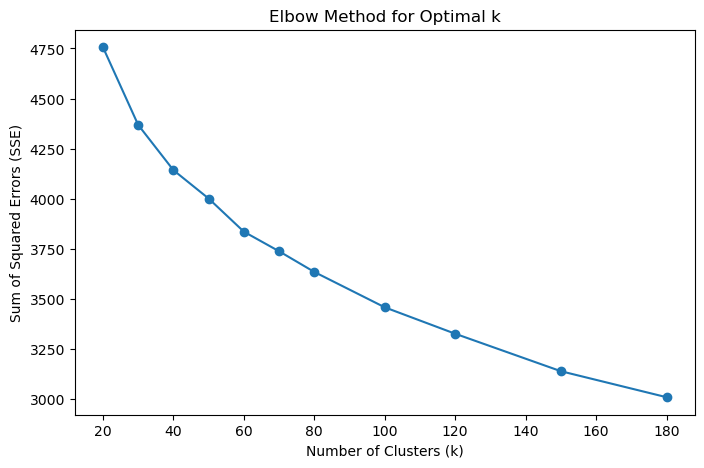

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(k_list, sses, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [45]:
labels = KMeans(n_clusters=50, random_state=42).fit(vectors).labels_

for i in range(k):
    print(f"Cluster {i}:, nombre de catégories: {len(np.where(labels == i)[0])}")
    for index in np.where(labels == i)[0]:
        print(metiers[index], end=", ")
    print("\n")

Cluster 0:, nombre de catégories: 308
cultivateur mobilisé, employé, employé administratif, employé alstom, employé apc, employé arct, employé are, employé au c.n.r., employé au chauffage central, employé au collège, employé au collège chaptal, employé au crédit foncier, employé au crédit lausannenais, employé au cylindrage, employé au district, employé au génie, employé au magasin général d'habillement, employé au ministère, employé au ministère de l'intérieur, employé au ministère des affaires étrangères, employé au mont de piété, employé au métro, employé au métropolitain, employé au plm, employé au pmu, employé au pouvoir saguenay, employé au séminaire, employé au théâtre, employé au tram-way, employé au télégraphe, employé au télégraphe de nehou, employé aux abattoirs, employé aux assurances, employé aux autobus, employé aux bateaux lausanneiens, employé aux cfa, employé aux contributions, employé aux frigorifiques, employé aux houillères, employé aux hypothèques, employé aux impô

In [38]:
salaires = pd.read_excel("data/SHS_TM.xlsx")
salaires.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Secteur ternaire et secondaire,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Secteur primaire,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Année,Produits alimentaires,"Vêtem., lingerie, chauss., literie",Industrie textile,Industrie du papier,Arts graphiques,Industrie chimique,"Bois, liège, meubles",Pierre et terre,Industrie d. métaux(2),...,Bureaux de consultation,"Hôtellerie, restaurants",Transports,Administration publique,Réparations,Vachers célibataires,"Employés pour tous travaux, célibataire",Employées pour le ménage et la ferme,Journaliers; dans la salaire y compris l'entre...,Journalières dans la salaire y compris l'entre...
1,1890,108.921199,103.27015,104.821419,112.245346,107.037516,120.666517,99.281174,107.81315,104.544406,...,106.972586,80.297075,101.829687,113.654991,89.279093,35.789977,28.698464,21.10833,1.509717,1.146831
2,1891,111.132797,105.367006,106.949772,114.524439,109.210867,123.116598,101.297036,110.00225,106.667135,...,109.144618,81.927473,103.897295,115.962706,91.091866,36.516677,29.281174,21.536926,1.540371,1.170116
3,1892,112.238596,106.415434,108.013949,115.663986,110.297542,124.341639,102.304967,111.0968,107.7285,...,110.230634,82.742671,104.931098,117.116564,91.998253,36.880027,29.572529,21.751223,1.555698,1.181759
4,1893,113.344395,107.463862,109.078126,116.803532,111.384217,125.56668,103.312897,112.191349,108.789864,...,111.31665,83.55787,105.964902,118.270422,92.90464,37.243377,29.863884,21.965521,1.571025,1.193402


In [3]:
salaires = ["produits alimentaires","vêtements, lingerie,chaussures,literies", "industrie textile", "industrie du papier", 
            "arts graphiques", "industrie chimique", "bois,liège,meubles", "pierre et terre", "industrie des métaux",  
            "horlogerie","bijouterie,gravure,frappe","construction,charpenterie","gaz,eau,éléctricité","commerce de gros",
            "commerce de détail","banques,établissements financiers","assurances privées","agences,locations,consultations",
            "affaires immobilières,location","bureaux de consultation","hôtellerie,restauration","transports","administration publique",
            "réparations", "vachers célibataires","employés pour tous,célibataires","employées pour le ménage et la ferme",
            "journaliers,entretien","journalières,entretien"]

In [57]:
# Compute category vectors
category_vectors = np.zeros((len(salaires), 300))

for i, cat in enumerate(salaires):
    doc = nlp(cat)
    word_vectors = [token.vector for token in doc if not token.is_stop and not token.is_punct and np.any(token.vector)]
    if word_vectors:
        category_vectors[i] = np.mean(word_vectors, axis=0)

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

SIMILARITY_THRESHOLD = 0.2

# Dictionary to store professions grouped by category
category_dict = defaultdict(list)

# Assign each profession to a category
for i, metier in enumerate(metiers):  # metiers is your list of profession names
    profession_vector = vectors[i].reshape(1, -1)  # Get vector from stored embeddings

    # Compute cosine similarity with all category vectors
    similarities = cosine_similarity(profession_vector, category_vectors)[0]

    # Find best category and its similarity score
    best_match_idx = np.argmax(similarities)
    best_category = salaires[best_match_idx]
    best_similarity = similarities[best_match_idx]  # Get best similarity score

    # If similarity is below the threshold, assign to "AUTRE"
    if best_similarity < SIMILARITY_THRESHOLD:
        best_category = "AUTRE"

    # Store the profession under the determined category
    category_dict[best_category].append(metier)

# Print results
for category, professions in category_dict.items():
    print(f"\n {category}:, nombre de professions: {len(professions)}")
    print(", ".join(professions))


 journalières,entretien:, nombre de professions: 488
 de télégraphe, accompagnant sexuel, accordeur de piano, accordeur de pianos, accordeur et professeur de piano, accordeur et professeur piano, accoucheuse, adjoint et propriétaire, affineur, agent d'atelier, agent d'entreprise de nettoyage, agent d'entretien, agent d'entretien gdf, agent d'essai, agent d'outillage, agent de contact, agent de maintenance, agent de nettoyage, agent de planning, agent de portage, agent de service jeunesse et sport, agent de train, agent de travaux dde, agent de voyage, agent de voyages, agent du bien-être, agent d’entretien, agent en sommeil, agent professionnel d'atelier, agent technique d'entretien, agent voyer dessinateur, agriculteur et propriétaire, agriculteur et soldat, aide, aide agriculteur, aide arpenteur, aide artificier, aide boiseur, aide briqueteur, aide chauffeur, aide chimiste, aide conducteur, aide conducteur d'engins, aide conducteur typographe, aide couturière, aide couvreur, aide cu

In [65]:
len(category_dict['AUTRE'])

1551

In [1]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import numpy as np

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Function to get BERT embeddings for text
def get_bert_embeddings(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    
    # Get embeddings from BERT model (last hidden state)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # We can use the [CLS] token's embedding (first token in the sequence)
    return outputs.last_hidden_state[:, 0, :].numpy()

# Compute category vectors using BERT embeddings
category_vectors = np.zeros((len(salaires), 768))  # 768 is the size of BERT embeddings

for i, cat in enumerate(salaires):
    category_vectors[i] = get_bert_embeddings(cat)


# Convert professions to BERT embeddings
profession_vectors = np.zeros((len(metiers), 768))  # 768 is the size of BERT embeddings

for i, metier in enumerate(metiers):
    profession_vectors[i] = get_bert_embeddings(metier)

NameError: name 'salaires' is not defined

In [72]:
# Dictionary to store professions grouped by category
category_dict = defaultdict(list)

SIMILARITY_THRESHOLD = 0.5  

# Assign each profession to a category
for i, metier in enumerate(metiers):  # metiers is your list of profession names
    profession_vector = profession_vectors[i].reshape(1, -1)  # Get BERT vector from your profession embeddings

    # Compute cosine similarity with all category vectors
    similarities = cosine_similarity(profession_vector, category_vectors)[0]

    # Find best category and its similarity score
    best_match_idx = np.argmax(similarities)
    best_category = salaires[best_match_idx]
    best_similarity = similarities[best_match_idx]  # Get best similarity score

    # If similarity is below the threshold, assign to "AUTRE"
    if best_similarity < SIMILARITY_THRESHOLD:
        best_category = "AUTRE"

    # Store the profession under the determined category
    category_dict[best_category].append(metier)

# Print the length of "AUTRE" category
print(f"\n Length of 'AUTRE' category: {len(category_dict['AUTRE'])}")

# Optionally, print the professions in "AUTRE"
if 'AUTRE' in category_dict:
    print(f"\nProfessions in 'AUTRE':")
    print(", ".join(category_dict['AUTRE']))

# Optionally, print professions in each category
for category, professions in category_dict.items():
    print(f"\n {category}: nombre de professions: {len(professions)}")
    print(", ".join(professions))



 Length of 'AUTRE' category: 14

Professions in 'AUTRE':
brigadier, brigadier chef, compositeur, compositeur musicien, croix de guerre, designer, détaillant, ex, hôtel, lieutenant, marquis, regent, écrivain, éditeur

 commerce de gros: nombre de professions: 2922
 de télégraphe, accordeuse, acheteur au service achat péchiney, acheteur aux magasins du louvre, acheteur commercial, acteur de cinéma, acteur de théâtre, actuaire, adjoint administratif, adjoint au tribunal, adjoint en mairie, adjoint technique en mairie, adjudant chef des douanes, administrateur chef des affaires maritimes, administrateur commercial, administrateur de biens, administrateur de l'enregistrement, administrateur de sociétés, administrateur des hospices, administrateur postes, affranchisseur de bestiaux, agent air suisse, agent assureur, agent au pmu, agent aux postes, agent breveté des douanes, agent commercial air suisse, agent comptable, agent d'administration, agent d'exploitation, agent d'exploitation aux t

In [9]:
import torch
from transformers import CamembertTokenizer, CamembertModel
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Load BERT model and tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
model = CamembertModel.from_pretrained("camembert-base").to(device)

# Function to get BERT embeddings for text
def get_bert_embeddings(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)
    
    # Get embeddings from BERT model (last hidden state)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # We can use the [CLS] token's embedding (first token in the sequence)
    return outputs.last_hidden_state[:, 0, :]

Using device: cuda


In [10]:
from tqdm import tqdm
# Compute category vectors using BERT embeddings (on GPU)
category_vectors = torch.zeros((len(salaires), 768), device="cuda")  # Store on GPU

for i, cat in enumerate(tqdm(salaires)):
    category_vectors[i] = get_bert_embeddings(cat)

# Convert professions to BERT embeddings (on GPU)
profession_vectors = torch.zeros((len(metiers), 768), device="cuda")  # Store on GPU
for i, metier in enumerate(tqdm(metiers)):
    profession_vectors[i] = get_bert_embeddings(metier)

100%|█████████████████████████████████████| 11389/11389 [02:00<00:00, 94.41it/s]


In [13]:
import torch
from collections import defaultdict
import torch.nn.functional as F

# Dictionary to store professions grouped by category
category_dict = defaultdict(list)

SIMILARITY_THRESHOLD = 0.7

# Compute cosine similarity using PyTorch
def cosine_similarity_torch(vec1, vec2):
    vec1 = F.normalize(vec1, p=2, dim=1)  # Normalize vectors (L2 norm)
    vec2 = F.normalize(vec2, p=2, dim=1)
    return torch.mm(vec1, vec2.T)  # Compute cosine similarity

# Assign each profession to a category
for i, metier in enumerate(metiers):  
    profession_vector = profession_vectors[i].unsqueeze(0)  # Get BERT vector (1, 768)

    # Compute cosine similarity with all category vectors
    similarities = cosine_similarity_torch(profession_vector, category_vectors).squeeze(0)  # Shape: (num_categories,)

    # Find best category index and similarity score
    best_match_idx = torch.argmax(similarities)  # Get index of highest similarity
    best_category = salaires[best_match_idx.item()]  # Convert index to category name
    best_similarity = similarities[best_match_idx].item()  # Convert tensor to float

    # If similarity is below the threshold, assign to "AUTRE"
    if best_similarity < SIMILARITY_THRESHOLD:
        best_category = "AUTRE"

    # Store the profession under the determined category
    category_dict[best_category].append(metier)

# Print the length of "AUTRE" category
print(f"\n Length of 'AUTRE' category: {len(category_dict['AUTRE'])}")

# Optionally, print the professions in "AUTRE"
if 'AUTRE' in category_dict:
    print(f"\nProfessions in 'AUTRE':")
    print(", ".join(category_dict['AUTRE']))

# Optionally, print professions in each category
for category, professions in category_dict.items():
    print(f"\n {category}: nombre de professions: {len(professions)}")
    print(", ".join(professions))



 Length of 'AUTRE' category: 0

Professions in 'AUTRE':


 commerce de détail: nombre de professions: 206
 de télégraphe, agent de distribution, agent de fabrique, agent parc auto, ancien chapelier, ancien négociant, ancien plafonneur, approvisionneur, artisan commerçant, bijoutier, bijoutier fabricant, boucher et marchand, boucher-épicier, bouilleur ambulant, bouquier, bourgeois et tisserand, cafetier menuisier, cafetier restaurateur, calibriste, capitaine de navire marchand, chapelier de feutre, charcutier boucher, charcutier itinérant, charpentier de vaisseaux, charpentier et cabaretier, chef de distribution, chef de gare retraité, chef de magasin adjoint, chiffonnier, coiffeur et négociant, commandant de bateau, commis de librairie, commis de marchand, commis de négociant, commis laitier, commis-épicier, commissionnaire en grains, commissionnaire en marchandises, conducteur de pont roulant, contracteur-ouvrier, contremaître de fabrique, contremaître de la compagnie de pulpe, contr

In [14]:
import csv

with open("data/category_mappings.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Category", "Professions"])  # Header
    
    for category, professions in category_dict.items():
        writer.writerow([category, ", ".join(professions)])

print("Results saved to category_mappings.csv ✅")

Results saved to category_mappings.csv ✅


In [ ]:
# Dictionary to store professions grouped by category
category_dict = defaultdict(list)

SIMILARITY_THRESHOLD = 0.5  

# Assign each profession to a category
for i, metier in enumerate(metiers):  # metiers is your list of profession names
    profession_vector = profession_vectors[i].reshape(1, -1)  # Get BERT vector from your profession embeddings

    # Compute cosine similarity with all category vectors
    similarities = cosine_similarity(profession_vector, category_vectors)[0]

    # Find best category and its similarity score
    best_match_idx = np.argmax(similarities)
    best_category = salaires[best_match_idx]
    best_similarity = similarities[best_match_idx]  # Get best similarity score

    # If similarity is below the threshold, assign to "AUTRE"
    if best_similarity < SIMILARITY_THRESHOLD:
        best_category = "AUTRE"

    # Store the profession under the determined category
    category_dict[best_category].append(metier)

# Print the length of "AUTRE" category
print(f"\n Length of 'AUTRE' category: {len(category_dict['AUTRE'])}")

# Optionally, print the professions in "AUTRE"
if 'AUTRE' in category_dict:
    print(f"\nProfessions in 'AUTRE':")
    print(", ".join(category_dict['AUTRE']))

# Optionally, print professions in each category
for category, professions in category_dict.items():
    print(f"\n {category}: nombre de professions: {len(professions)}")
    print(", ".join(professions))
